# Homework 4. Heart Disease Dataset Analysis

## Step 1. Import the dataset

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

# Specifying path to the file containing our dataset
DATASET_PATH = 'heart.csv'

# Loading the dataframe
df = pd.read_csv(DATASET_PATH, delimiter=',')
df.head(6) # Showing first 6 entries

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Step 2. Draw some conclusions

### Step 2.1. 
Drop columns we are not interested in

In [11]:
df = df.drop(['restecg', 'exang', 'cp', 'oldpeak', 'slope', 'ca', 'thal'], axis=1)
df = df.rename(columns={
    "trestbps": "blood_pressure", 
    "chol": "cholesterol",
    "fbs": "diabetes",
    "thalach": "heart_rate",
    "target": "heart_disease"
})
df

,age,sex,blood_pressure,cholesterol,diabetes,heart_rate,heart_disease
0,52,1,125,212,0,168,0
1,53,1,140,203,1,155,0
2,70,1,145,174,0,125,0
3,61,1,148,203,0,161,0
4,62,0,138,294,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1
1021,60,1,125,258,0,141,0
1022,47,1,110,275,0,118,0
1023,50,0,110,254,0,159,1


### Step 2.2.
Let us build the correlation matrix!

In [12]:
df.corr()

,age,sex,blood_pressure,cholesterol,diabetes,heart_rate,heart_disease
age,1.000000,-0.103240,0.271121,0.219823,0.121243,-0.390227,-0.229324
sex,-0.103240,1.000000,-0.078974,-0.198258,0.027200,-0.049365,-0.279501
blood_pressure,0.271121,-0.078974,1.000000,0.127977,0.181767,-0.039264,-0.138772
cholesterol,0.219823,-0.198258,0.127977,1.000000,0.026917,-0.021772,-0.099966
diabetes,0.121243,0.027200,0.181767,0.026917,1.000000,-0.008866,-0.041164
heart_rate,-0.390227,-0.049365,-0.039264,-0.021772,-0.008866,1.000000,0.422895
heart_disease,-0.229324,-0.279501,-0.138772,-0.099966,-0.041164,0.422895,1.000000


Conclusions we can make:
1. There is a high correlation between the age and the blood pressure/cholesterol level, which is quite reasonable.
2. There is also a pretty high correlation between blood pressure and cholesterol and diabetes.
3. Finally, the presence of heart disease is highly correlated with the heart rate and sex
4. On the other hand, the heart rate and blood pressure has almost no correlation at all!

### Step 2.3.

Checking info about those who have a heart disease

In [14]:
df[df['heart_disease'] == 1].describe()

,age,sex,blood_pressure,cholesterol,diabetes,heart_rate,heart_disease
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.0
mean,52.408745,0.570342,129.245247,240.979087,0.134981,158.585551,1.0
std,9.631804,0.495498,16.112188,53.010345,0.342029,19.096928,0.0
min,29.000000,0.000000,94.000000,126.000000,0.000000,96.000000,1.0
25%,44.000000,0.000000,120.000000,208.000000,0.000000,149.000000,1.0
50%,52.000000,1.000000,130.000000,234.000000,0.000000,161.500000,1.0
75%,59.000000,1.000000,140.000000,265.750000,0.000000,172.000000,1.0
max,76.000000,1.000000,180.000000,564.000000,1.000000,202.000000,1.0


Drawing heart rate histogram

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

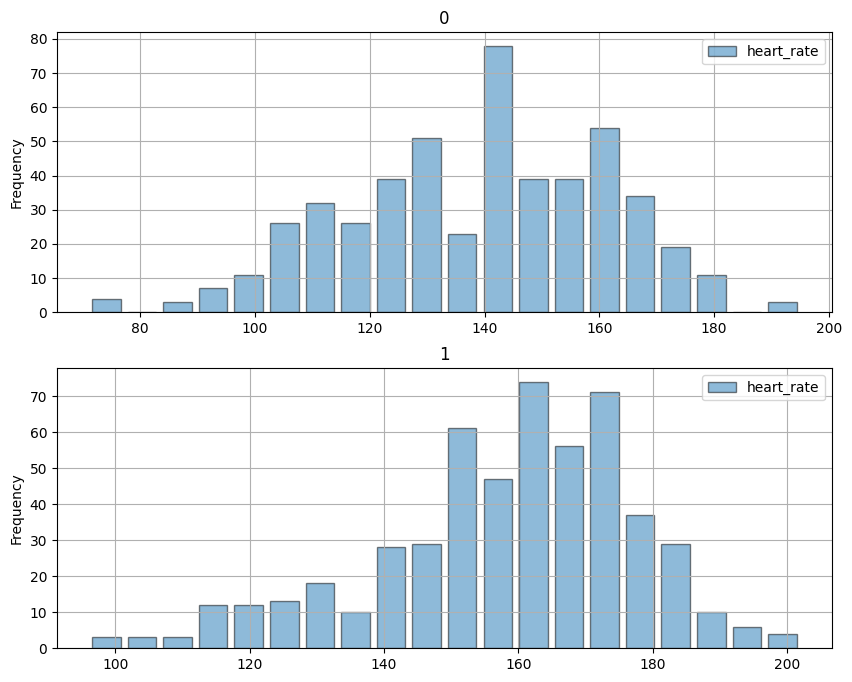

In [20]:
df.plot.hist(column="heart_rate", 
             by="heart_disease", 
             figsize=(10, 8), 
             bins=20, 
             alpha=0.5,
             edgecolor='black',
             rwidth=0.8,
             grid = True
            )

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

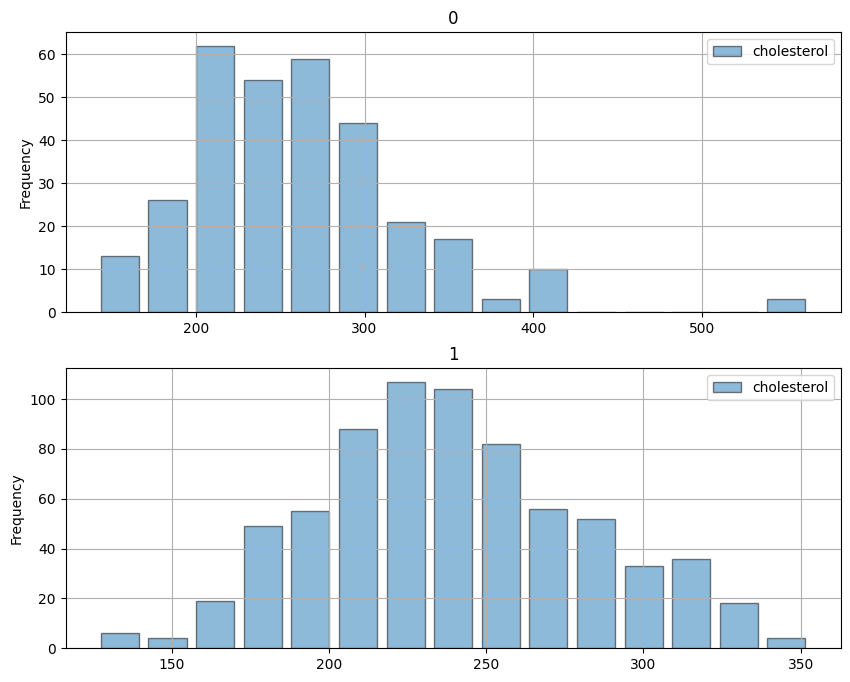

In [29]:
df.plot.hist(column="cholesterol", 
             by="sex", 
             figsize=(10, 8), 
             bins=15, 
             alpha=0.5,
             color='orange',
             edgecolor='black',
             rwidth=0.8,
             grid = True
            )